In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
np.array??

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (

In [3]:
import tarfile
import urllib

In [4]:
filePath = "./adult_train.csv"

In [5]:
data = pd.read_csv(filePath)
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data['Target'].value_counts()

 <=50K    24720
 >50K      7841
Name: Target, dtype: int64

In [8]:
data.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
%matplotlib inline

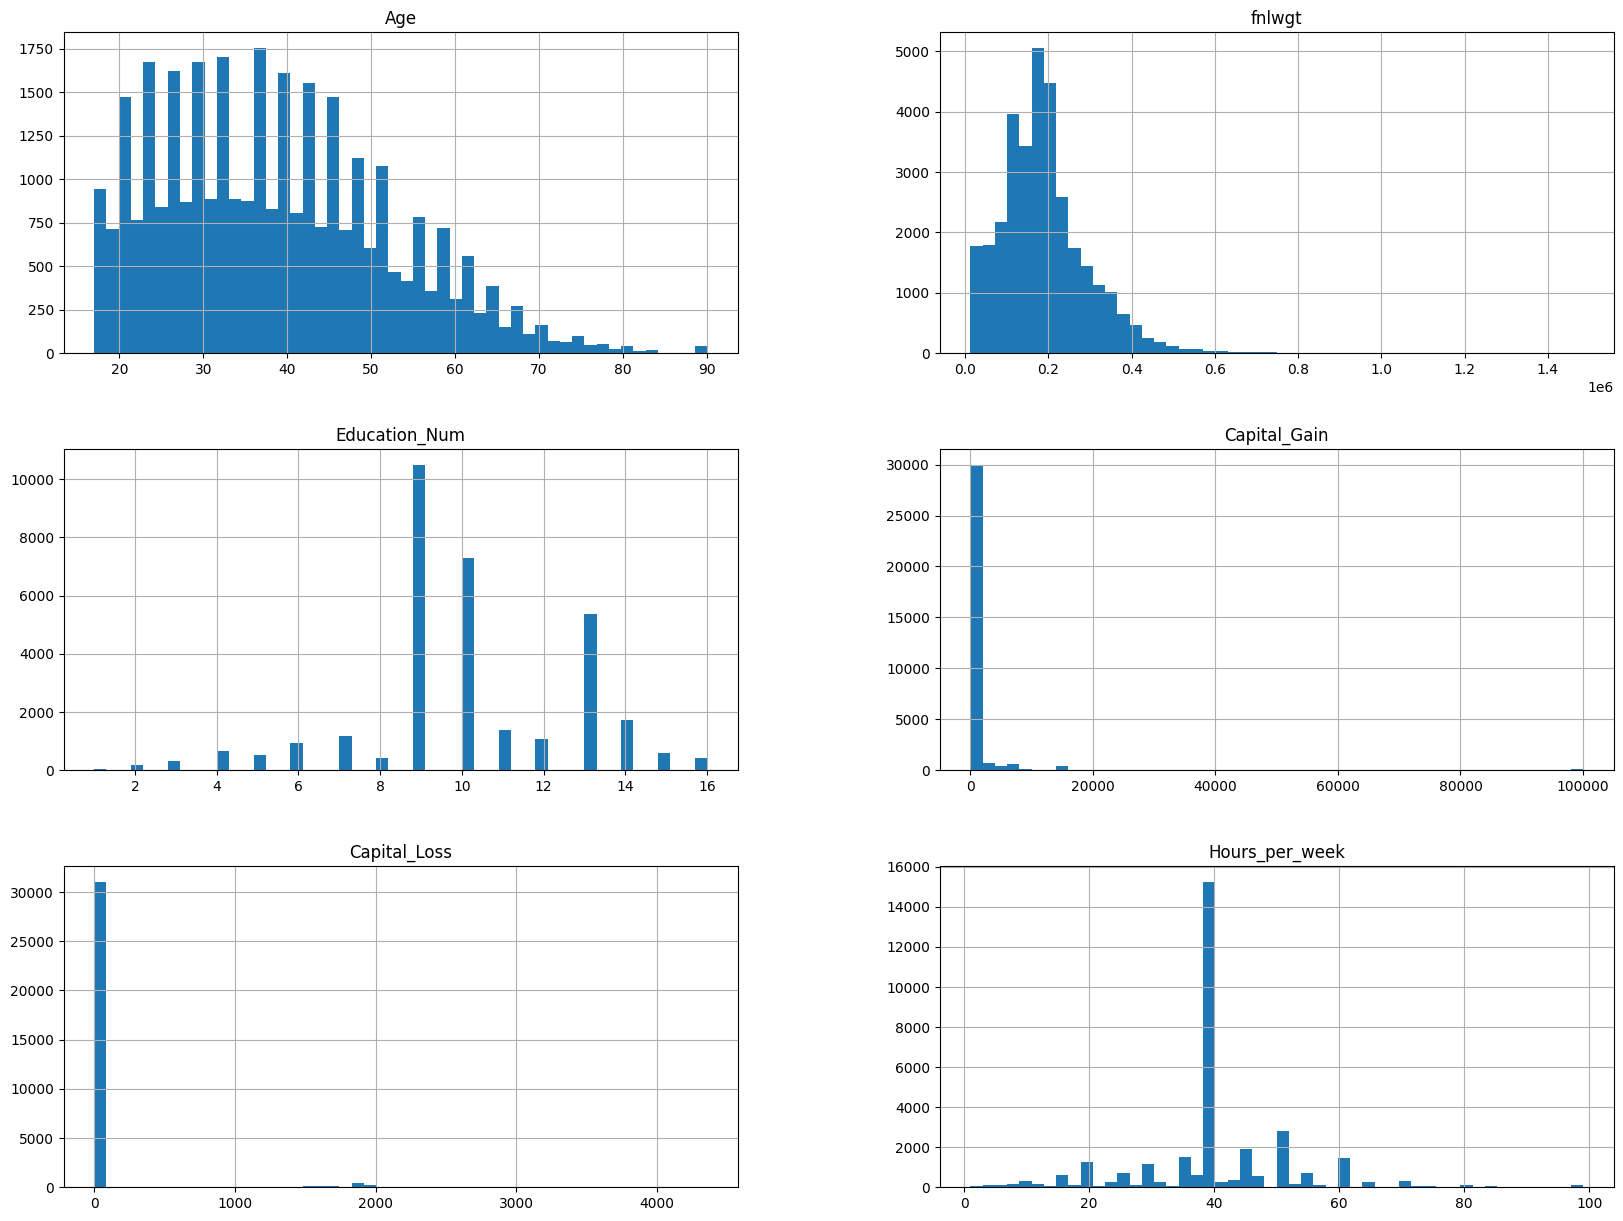

In [10]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [11]:
print("Hours per week range:", data.Hours_per_week.min(), data.Hours_per_week.max())
print("Age range:", data.Age.min(),data.Age.max())
print("fnlwgt range:", data.fnlwgt.min(),data.fnlwgt.max() )

Hours per week range: 1 99
Age range: 17 90
fnlwgt range: 12285 1484705


In [12]:
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 26049
Test set length: 6512


In [13]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [14]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

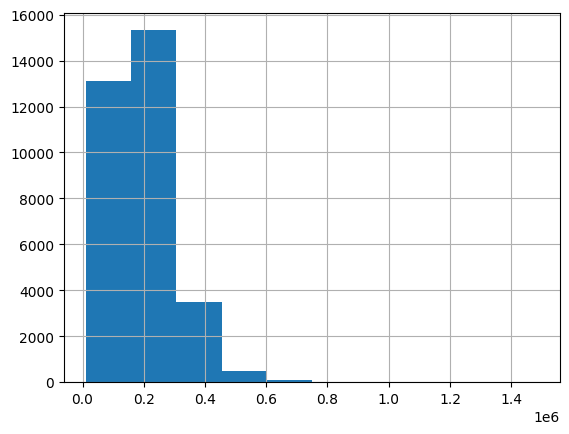

In [16]:
data.fnlwgt.hist();

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_with_id, data_with_id['Target']):
    print(train_index)
    strat_train_set = data_with_id.loc[train_index]
    strat_test_set = data_with_id.loc[test_index]

[15738 27985 30673 ... 23650 25301  5800]


In [18]:
data = strat_train_set.copy()
data

,index,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
15738,15738,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
27985,27985,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
30673,30673,20,NaN,122244,HS-grad,9,Never-married,NaN,Not-in-family,White,Female,0,0,28,United-States,<=50K
9505,9505,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,<=50K
26417,26417,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,8003,35,Self-emp-not-inc,179171,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,0,38,Germany,<=50K
20560,20560,39,Private,421633,Some-college,10,Divorced,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,<=50K
23650,23650,55,Private,82098,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,<=50K
25301,25301,26,Private,50053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K


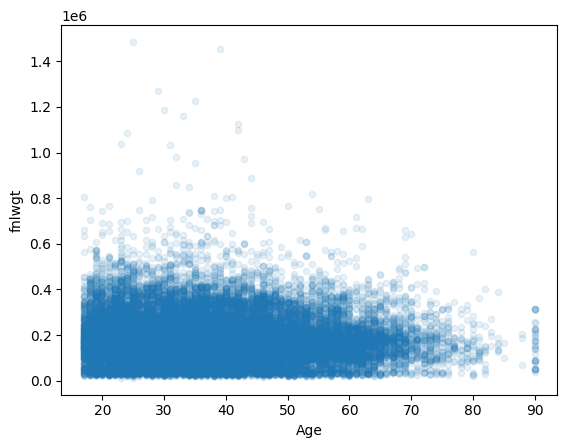

In [19]:
#диаграмма рассеяния
data.plot(kind='scatter', x='Age', y = 'fnlwgt',alpha = 0.1);

In [20]:
corr_matrix = data.corr()
corr_matrix['fnlwgt'].sort_values(ascending=False)

/var/folders/__/4rmkqmzd6918xf_csmqzn7yr0000gn/T/ipykernel_8549/1418417931.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


fnlwgt            1.000000
Capital_Gain     -0.002245
index            -0.003949
Capital_Loss     -0.006698
Hours_per_week   -0.017893
Education_Num    -0.043911
Age              -0.080311
Name: fnlwgt, dtype: float64

In [21]:
corr_matrix

,index,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
index,1.000000,0.004618,-0.003949,0.000509,-0.001404,0.002121,-0.001599
Age,0.004618,1.000000,-0.080311,0.033716,0.077424,0.061073,0.062378
fnlwgt,-0.003949,-0.080311,1.000000,-0.043911,-0.002245,-0.006698,-0.017893
Education_Num,0.000509,0.033716,-0.043911,1.000000,0.124952,0.079671,0.145552
Capital_Gain,-0.001404,0.077424,-0.002245,0.124952,1.000000,-0.031587,0.078203
Capital_Loss,0.002121,0.061073,-0.006698,0.079671,-0.031587,1.000000,0.055082
Hours_per_week,-0.001599,0.062378,-0.017893,0.145552,0.078203,0.055082,1.000000


In [22]:
from pandas.plotting import scatter_matrix

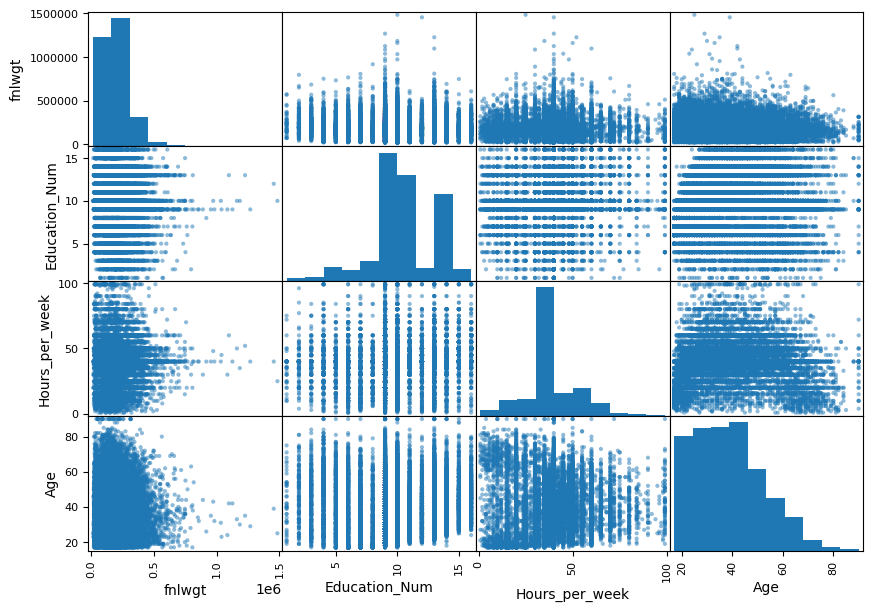

In [23]:
attributes = ['fnlwgt','Education_Num','Hours_per_week', 'Age']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot: xlabel='Age', ylabel='fnlwgt'>

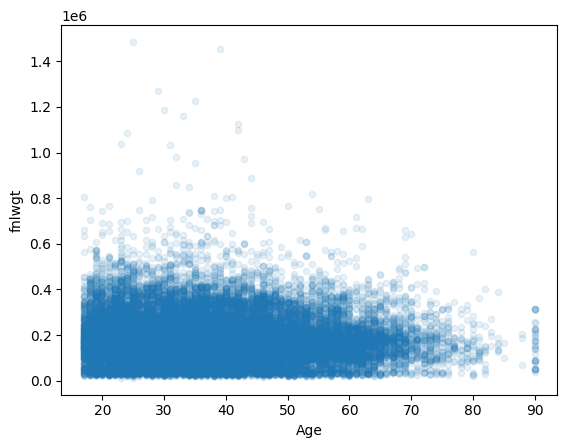

In [24]:
data.plot(kind='scatter',x='Age',y='fnlwgt',alpha=0.1)

In [25]:
data['finalweight_per_age'] = data['fnlwgt'] / data['Age']

In [26]:
corr_matrix = data.corr()
corr_matrix['fnlwgt'].sort_values(ascending=False)

/var/folders/__/4rmkqmzd6918xf_csmqzn7yr0000gn/T/ipykernel_8549/1418417931.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


fnlwgt                 1.000000
finalweight_per_age    0.818762
Capital_Gain          -0.002245
index                 -0.003949
Capital_Loss          -0.006698
Hours_per_week        -0.017893
Education_Num         -0.043911
Age                   -0.080311
Name: fnlwgt, dtype: float64

In [27]:
needed_features = ['finalweight_per_age','Age','Education_Num']

In [28]:
data = strat_train_set.drop('fnlwgt',axis=1)
adult_labels = strat_train_set['fnlwgt'].copy()

In [29]:
data.dropna(subset=['Workclass'])

,index,Age,Workclass,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
15738,15738,32,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
27985,27985,43,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
9505,9505,40,Local-gov,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,<=50K
26417,26417,24,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
14701,14701,51,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,7298,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,8003,35,Self-emp-not-inc,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,0,38,Germany,<=50K
20560,20560,39,Private,Some-college,10,Divorced,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,<=50K
23650,23650,55,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,<=50K
25301,25301,26,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # cчитается на числовых признаках, придется вручную откидывать нечисловые признаки

In [31]:
data_num = data.drop(['Target', 'Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'],axis = 1)
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True])

In [32]:
data_category = data[['Target']]
data_category

,Target
15738,>50K
27985,<=50K
30673,<=50K
9505,<=50K
26417,<=50K
...,...
8003,<=50K
20560,<=50K
23650,<=50K
25301,<=50K


In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [34]:
category_encoded = ordinal_encoder.fit_transform(data_category)
category_encoded[:2]

array([[1.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array([' <=50K', ' >50K'], dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
data_category_one_hot = onehotEnconder.fit_transform(data_category)
data_category_one_hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Трансформер

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
age_ix,fnlwgt_ix,education_num_ix,hours_per_week_idx = 1,3,4,13


class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_hours_per_age = False):
        self.add_hours_per_age =add_hours_per_age

    def fit(self,X,y = None):
        return self

    def transform(self,X,y=None):
        education_per_age = X[:, education_num_ix] / X[:,age_ix]
        if self.add_hours_per_age:
            add_hours_per_age = X[:, hours_per_week_idx] / X[:, age_ix]
            return np.c_[X,education_per_age,add_hours_per_age]
        else:
            return np.c_[X,education_per_age]

In [38]:
additive_transformer = CombinedAttributeAdder(add_hours_per_age = False)
data_extra_attributes = additive_transformer.transform(data.values)

In [39]:
data_extra_attributes

array([[15738, 32, ' Private', ..., ' United-States', ' >50K', 0.40625],
       [27985, 43, ' Private', ..., ' United-States', ' <=50K',
        0.32558139534883723],
       [30673, 20, nan, ..., ' United-States', ' <=50K', 0.45],
       ...,
       [23650, 55, ' Private', ..., ' United-States', ' <=50K',
        0.16363636363636364],
       [25301, 26, ' Private', ..., ' United-States', ' <=50K', 0.5],
       [5800, 19, ' Private', ..., ' United-States', ' <=50K',
        0.3157894736842105]], dtype=object)

## Конвееризация

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [41]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [42]:
data_num_transformed

array([[-0.04929599, -0.48306519,  1.13054018, ..., -0.21736176,
         0.36394747, -0.20865647],
       [ 1.25663851,  0.32334184,  1.51766649, ..., -0.21736176,
         0.36394747, -0.20865647],
       [ 1.54326804, -1.36278194, -0.41796503, ..., -0.21736176,
        -1.00510197, -0.20865647],
       ...,
       [ 0.7943844 ,  1.20305859, -0.41796503, ..., -0.21736176,
         1.16927066, -0.20865647],
       [ 0.9704355 , -0.92292356,  1.13054018, ..., -0.21736176,
         1.16927066, -0.20865647],
       [-1.10901486, -1.43609167, -1.57934394, ..., -0.21736176,
        -0.03871413, -0.20865647]])

In [43]:
from sklearn.compose import ColumnTransformer
num_attributes = list(data_num)


full_pipeline = ColumnTransformer([
    ("num", pipeline,num_attributes),
])


data_prepared = full_pipeline.fit_transform(data)

## Обучение модели (Линейная регрессия)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_prepared,adult_labels)

LinearRegression()

In [45]:
some_data = data.iloc[:14]
data_labels = adult_labels.iloc[:14]
data_prepared_some = full_pipeline.transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [188659.85721553 179601.72318938 203516.16885483 190339.9308924
 193566.22291648 184357.45691619 185152.91008106 180407.83004266
 181627.68148989 197910.74890857 188683.18688026 175638.82607278
 190300.8990291  196722.93419153]
Метки: [37210, 101950, 122244, 24763, 113936, 237630, 310255, 121441, 191712, 149646, 113364, 63424, 175738, 38251]


In [46]:
from sklearn.metrics import mean_squared_error

data_prepared = full_pipeline.transform(data)
data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(adult_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

105066.17878598308


In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,adult_labels)

DecisionTreeRegressor()

In [48]:
data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(adult_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.0


## Кросс-валидация

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor,data_prepared,adult_labels,scoring='neg_mean_squared_error') # функция считает utility функцию или функцию качества, которая является противоположностью функции потерь

scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(scores)

Оценки: [152739.72993002 151431.40119167 150638.92941178 149745.40814576
 154325.81240131]
Среднее: 151776.2562161092
Стандартное отклонение: 1610.2980762237871


In [51]:
lin_scores = cross_val_score(model,data_prepared,adult_labels,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-lin_scores)
display_scores(scores)

Оценки: [112294.35689008 105133.86976394 103323.24596439 106997.68476719
 103180.9973945  101237.16256358 104952.07820739 105333.19817159
 105058.60857855 103021.38284013]
Среднее: 105053.25851413482
Стандартное отклонение: 2854.8001994473616


In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(data_prepared,adult_labels)
forest_rmse = mean_squared_error(adult_labels, forest_model.predict(data_prepared))
print(np.sqrt(forest_rmse))
forest_rmse_scores = cross_val_score(model, data_prepared,adult_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-forest_rmse_scores))

41746.43071510338
Оценки: [108763.82397367 105169.85434055 102209.59883581 105147.25940273
 104036.4929551 ]
Среднее: 105065.40590157227
Стандартное отклонение: 2140.570090249509


### GridSearch и Fine-Tunning

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[3,10,30], 'max_features':[2,4,7]
    }, 
    {
        'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]   
    }
]

regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,adult_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

In [55]:
cv_res = grid_search.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

125863.33889603413 {'max_features': 2, 'n_estimators': 3}
116611.15427629792 {'max_features': 2, 'n_estimators': 10}
113807.48077183856 {'max_features': 2, 'n_estimators': 30}
125496.87254146102 {'max_features': 4, 'n_estimators': 3}
115937.44502053891 {'max_features': 4, 'n_estimators': 10}
112718.67425624348 {'max_features': 4, 'n_estimators': 30}
126015.01161936266 {'max_features': 7, 'n_estimators': 3}
116023.24663458305 {'max_features': 7, 'n_estimators': 10}
112443.06428499609 {'max_features': 7, 'n_estimators': 30}
131520.8040563178 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
125158.80633691708 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
123059.27706010334 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
131964.95853797224 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
123991.2123140977 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
121959.43872123519 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
13

## Важность признаков

In [56]:
feature_importances = grid_search.best_estimator_.feature_importances_
display(feature_importances)
extra_attributes = ["finalweight_per_age", 'hours_per_age']
# cat_encoder = full_pipeline.named_transformers_['cat']
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# + cat_one_hot_attribs
attributes = num_attributes + extra_attributes 
display(sorted(zip(feature_importances,attributes),reverse=True))

array([0.55855408, 0.17682212, 0.09144075, 0.02970859, 0.00996933,
       0.12154402, 0.0119611 ])

[(0.5585540830784439, 'index'),
 (0.17682212233208464, 'Age'),
 (0.12154402260944347, 'Hours_per_week'),
 (0.09144075094314913, 'Education_Num'),
 (0.0297085915140447, 'Capital_Gain'),
 (0.011961095097412333, 'finalweight_per_age'),
 (0.009969334425422048, 'Capital_Loss')]

In [57]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('Target',axis=1)
y_test = strat_test_set['Target'].copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_test = labelencoder.fit_transform(y_test.values)
y_test[:10]
y_test.shape

(6513,)

In [58]:
X_test_preprocessed = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_preprocessed)
final_predictions.shape

(6513,)

In [59]:
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

197894.60945855165


In [60]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc = squared_errors.mean(),scale = stats.sem(squared_errors)))

array([196685.15209232, 199096.7198422 ])

## 1

In [61]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf',gamma='scale',C = 0.1)
svr_model.fit(data_prepared,adult_labels)
print("Raw estimations:")
svr_squared_errors = mean_squared_error(adult_labels, svr_model.predict(data_prepared))
svr_rmse_score = np.sqrt(svr_squared_errors)
display_scores(svr_rmse_score)
print("cross val score")
scores = cross_val_score(svr_model,data_prepared,adult_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

Raw estimations:
Оценки: 106126.58428230837
Среднее: 106126.58428230837
Стандартное отклонение: 0.0
cross val score
Оценки: [109881.68944183 106086.12688883 103249.18230908 106464.12111052
 104830.68563306]
Среднее: 106102.36107666566
Стандартное отклонение: 2198.738014240984


In [62]:
svr_predictions = svr_model.predict(X_test_preprocessed)
svr_mse = mean_squared_error(y_test,svr_predictions)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)

178547.7495270919


In [63]:
svr_params = [
    {
        'kernel':['linear'], 'C':[0.01,0.1,1,10,100]
    },
    {
        'kernel':['rbf'],'C':[0.01,0.1,1,10,100],'gamma':['scale',0.1,0.01,0.001,0.0001]
    },
]
model = SVR()
grid_search_svr = GridSearchCV(model,param_grid=svr_params,cv=5, scoring='neg_mean_squared_error',return_train_score=True,n_jobs= -1,verbose=2)
grid_search_svr.fit(data_prepared,adult_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [64]:
grid_search_svr.best_params_

{'C': 100, 'kernel': 'linear'}

In [65]:
cv_res = grid_search_svr.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

106124.09478288844 {'C': 0.01, 'kernel': 'linear'}
106108.24498858747 {'C': 0.1, 'kernel': 'linear'}
105962.86514757015 {'C': 1, 'kernel': 'linear'}
105721.4557729304 {'C': 10, 'kernel': 'linear'}
105650.64436233767 {'C': 100, 'kernel': 'linear'}
106126.51280429488 {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
106126.51369796746 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
106126.65377978432 {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
106126.69034618337 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
106126.6942434354 {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
106125.14063547058 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
106125.13473670212 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
106126.25141864025 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
106126.64928049206 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
106126.69029996777 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
106113.0050250625 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
106113.01475814122 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'

In [66]:
negative_score = grid_search_svr.best_score_
print("RMSE Score: ", np.sqrt(-negative_score))

RMSE Score:  105650.64436233767


## 2

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,expon
params_distribution = {
    'kernel':['linear','rbf'],
    'C': reciprocal(20,20000),
    'gamma':expon(scale=1.0)
}
model = SVR()
randomized_search_svr = RandomizedSearchCV(svr_model,param_distributions=params_distribution,n_iter=50,cv = 5,scoring='neg_mean_squared_error',verbose=2 ,random_state=42,n_jobs =-1)
randomized_search_svr.fit(data_prepared,adult_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  53.6s
[CV] END ................................C=10, kernel=linear; total time=  50.3s
[CV] END ...............................C=100, kernel=linear; total time=  51.6s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time= 1.2min
[CV] END ...................C=0.01, gamma=0.0001, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.2min
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.2min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
[CV] END ......................C=1, gamma=0.000

RandomizedSearchCV(cv=5, estimator=SVR(C=0.1), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc7701e8e80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc7f4263970>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
randomized_search_svr.best_params_

{'C': 1369.584019114956, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}

In [69]:
cv_res = randomized_search_svr.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

105649.61229682462 {'C': 265.8583788632432, 'gamma': 3.010121430917521, 'kernel': 'linear'}
105647.09606184629 {'C': 4366.193678104918, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}
105787.67193858529 {'C': 58.750769152656574, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}
105650.27206021926 {'C': 200.5191380457913, 'gamma': 0.15416196746656105, 'kernel': 'linear'}
106104.17396972646 {'C': 23.055974256464793, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
105679.66842130783 {'C': 13082.421055385465, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}
105794.22108206956 {'C': 70.99757664393003, 'gamma': 0.3627537294604771, 'kernel': 'rbf'}
105681.97353203173 {'C': 21.000465008462697, 'gamma': 0.023332523598323388, 'kernel': 'linear'}
105467.435285189 {'C': 1369.584019114956, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}
105593.87646266467 {'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
105643.8431080121 {'C': 4534.797304756079, 'gamma': 0.2227358621286903, 'kernel'

In [70]:
negative_score = grid_search_svr.best_score_
print("RMSE Score: ", np.sqrt(-negative_score))

RMSE Score:  105650.64436233767


## 3

In [71]:
k = 5

In [72]:
def select_top_k_features(features,k):
    return np.sort(np.argpartition(np.array(features), -k)[-k:])

In [73]:
class TopFeatureSelection(BaseEstimator,TransformerMixin):
    def __init__(self,feature_importance,k):
        self.feature_importance = feature_importance
        self.k = k
    def fit(self,X, y = None):
        self.feature_indices_ = select_top_k_features(self.feature_importance,k)
        return self
    def transform(self,X,y=None):
        return X[:,self.feature_indices_]

In [74]:
changed_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('feature_selection', TopFeatureSelection(feature_importances,k))
])

## 4

In [75]:
final_pipeline = Pipeline([
    ('preprocessing', changed_pipeline),
    ('model', LinearRegression())
])

final_pipeline.fit(data,adult_labels)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributeAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['index',
                                                                    'Age',
                                                                    'Education_Num',
                                                                    'Capital_Gain',
                                                                    'Capital_Loss',
                                                                    'Hours_per_week'])])),
                                 ('feature_selection',
                                  TopFeatureSelection(feature_importance=array([0.55855408, 0.17682212, 0.09144075, 0.02970859, 0.00996933,
       0.12154402, 0.0119611 ]),
                                                      k=5))])),
                ('model', LinearRegression())])

In [76]:
some_data = data[:4]
some_labels = adult_labels[:4]
predictions = final_pipeline.predict(some_data)
print("Predictions: ",predictions)
print("Actual Predictions: ",some_labels)
mse = mean_squared_error(some_labels,predictions)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

Predictions:  [188682.51243651 179768.15729538 203296.0578455  190379.2657677 ]
Actual Predictions:  15738     37210
27985    101950
30673    122244
9505      24763
Name: fnlwgt, dtype: int64
RMSE:  125496.78401905972


/var/folders/__/4rmkqmzd6918xf_csmqzn7yr0000gn/T/ipykernel_8549/1848708162.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  some_labels = adult_labels[:4]


## 5

In [77]:
params = [{
'preprocessing__preprocessing__num__imputer__strategy':['mean','median','most_frequent'],
'preprocessing__feature_selection__k':list(range(1, len(feature_importances) + 1))
}]

grid_search = GridSearchCV(final_pipeline,params,cv = 5,scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(data,adult_labels)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, prep

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                                                                           CombinedAttributeAdder()),
                                                                                                          ('std_scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['index',
                                                                                           'Age',
                                                                                           'Education_Num',
                                                                                           'Capital_Gain',
                                                                                           'Capital_Loss',
                                                                                           'Hours_per_week'])...
                                                         TopFeatureSelection(feature_importance=array([0.55855408, 0.17682212, 0.09144075, 0.02970859, 0.00996933,
       0.12154402, 0.0119611 ]),
                                                                             k=5))])),
                                       ('model', LinearRegression())]),
             param_grid=[{'preprocessing__feature_selection__k': [1, 2, 3, 4, 5,
                                                                  6, 7],
                          'preprocessing__preprocessing__num__imputer__strategy': ['mean',
                                                                                   'median',
                                                                                   'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributeAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['index',
                                                                    'Age',
                                                                    'Education_Num',
                                                                    'Capital_Gain',
                                                                    'Capital_Loss',
                                                                    'Hours_per_week'])])),
                                 ('feature_selection',
                                  TopFeatureSelection(feature_importance=array([0.55855408, 0.17682212, 0.09144075, 0.02970859, 0.00996933,
       0.12154402, 0.0119611 ]),
                                                      k=1))])),
                ('model', LinearRegression())])

In [79]:
grid_search.best_params_

{'preprocessing__feature_selection__k': 1,
 'preprocessing__preprocessing__num__imputer__strategy': 'mean'}

In [80]:
np.sqrt(-grid_search.best_score_)

105087.51579178056

[CV] END ...............................C=0.1, kernel=linear; total time=  47.1s
[CV] END .................................C=1, kernel=linear; total time=  45.5s
[CV] END ................................C=10, kernel=linear; total time=  45.8s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time= 1.3min
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.2min
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time= 1.2min
[CV] END ...................C=0.01, gamma=0.0001, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.6min
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.1min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.1min
[CV] END ...................